In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stock_data.csv',parse_dates= True, index_col='Date')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,2.842648e+01,1.325724e+01,9.10,1.617500e+01,27.18,3.665500e+01,7.302000e+01
High,3019.0,2.876653e+01,1.335669e+01,9.48,1.638500e+01,27.49,3.703500e+01,7.325000e+01
Low,3019.0,2.806656e+01,1.315733e+01,8.94,1.597000e+01,26.82,3.630500e+01,7.246000e+01
Close,3019.0,2.841273e+01,1.325816e+01,8.95,1.613000e+01,27.10,3.663500e+01,7.293000e+01
Volume,3019.0,2.158391e+07,1.926231e+07,1939061.00,1.248025e+07,17321301.00,2.512757e+07,4.382317e+08


In [5]:
df.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [6]:
# Plotting Line plot for Time Series data:

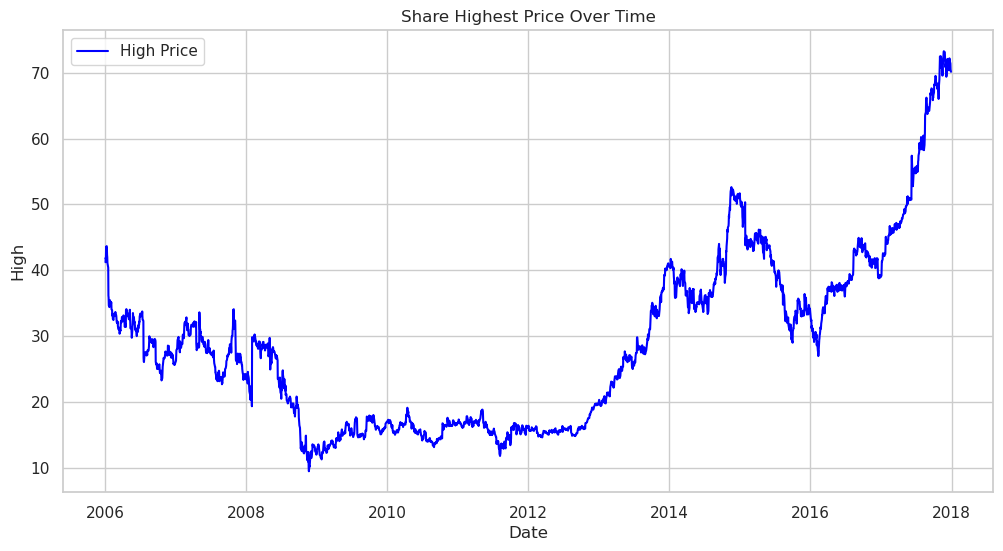

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
plt.show()

In [8]:
# Resampling

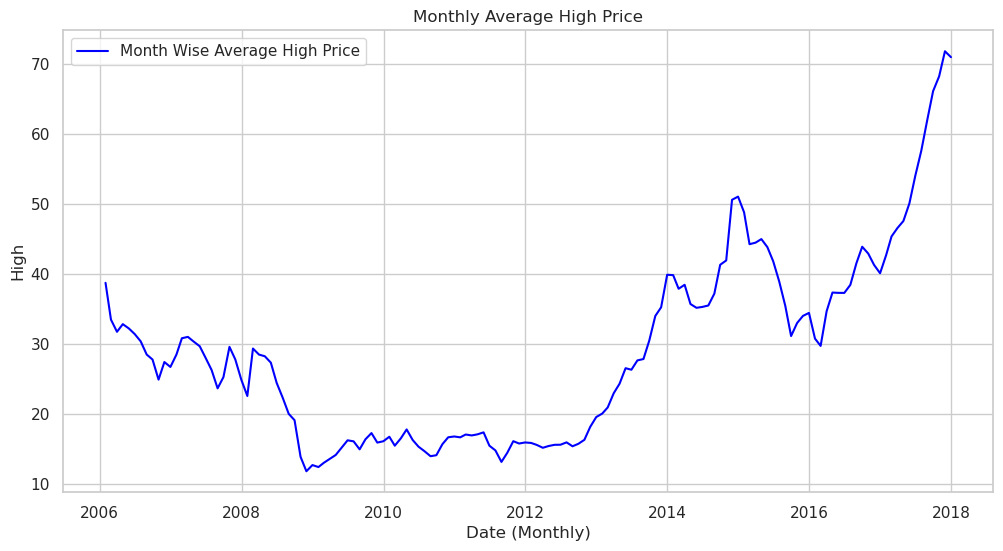

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_numeric and df_resampled are correctly defined
df_numeric = df.select_dtypes(include='number')
df_resampled = df_numeric.resample('ME').mean()  # Resampling to monthly frequency, using mean as an aggregation function

# Set the style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size before plotting

sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')
#x-axis: Dates from the DataFrame’s index.

# Customize the plot
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Average High Price')  # Optional title
plt.legend()  # Show legend

# Show the plot
plt.show()


In [10]:
df.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [11]:
'''

Detecting Seasonality Using Auto Correlation

We will detect Seasonality using the autocorrelation function (ACF) plot. 
Peaks at regular intervals in the ACF plot suggest the presence of seasonality

'''

'\n\nDetecting Seasonality Using Auto Correlation\n\nWe will detect Seasonality using the autocorrelation function (ACF) plot. \nPeaks at regular intervals in the ACF plot suggest the presence of seasonality\n\n'

<Figure size 1200x600 with 0 Axes>

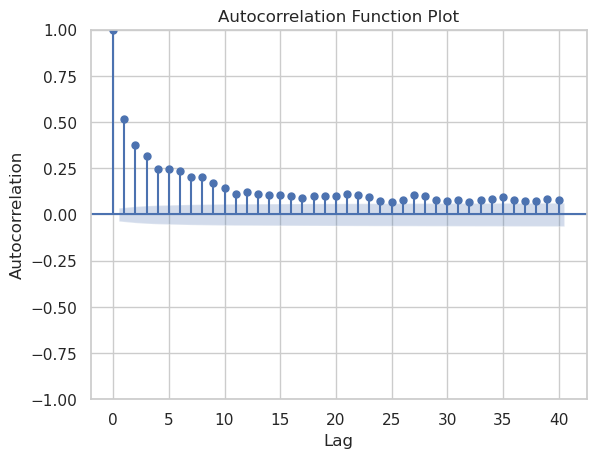

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,6))
plot_acf(df['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function Plot')
plt.show()

In [26]:
'''

from statsmodels.tsa.stattools import adfuller:

adfuller is a function that performs the Augmented Dickey-Fuller test, 
which is used to check if a time series is stationary
'''

'\n\nfrom statsmodels.tsa.stattools import adfuller:\n\nadfuller is a function that performs the Augmented Dickey-Fuller test, \nwhich is used to check if a time series is stationary\n'

In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535944
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


In [30]:
'''
ADF Statistic: A value computed by the test. 
If it is less than the critical values, the time series is likely stationary.
p-value: A probability value. If it is small (typically less than 0.05), 
it indicates strong evidence 
against the null hypothesis, so you might reject it.
Critical Values: Thresholds at different confidence levels.
If the ADF Statistic is less than these values, you reject the null hypothesis.
'''

'\nADF Statistic: A value computed by the test. \nIf it is less than the critical values, the time series is likely stationary.\np-value: A probability value. If it is small (typically less than 0.05), \nit indicates strong evidence \nagainst the null hypothesis, so you might reject it.\nCritical Values: Thresholds at different confidence levels.\nIf the ADF Statistic is less than these values, you reject the null hypothesis.\n'

In [32]:
'''
Smoothening the data using Differencing and Moving Average

Differencing involves subtracting the previous observation from the current observation 
to remove trends or seasonality. 

'''

'\nSmoothening the data using Differencing and Moving Average\n\nDifferencing involves subtracting the previous observation from the current observation \nto remove trends or seasonality. \n\n'

In [34]:
df['high_diff'] = df['High'].diff()

In [38]:
df.head(5)

,Open,High,Low,Close,Volume,Name,high_diff
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,0.68
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,-0.17
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,1.84
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,0.09


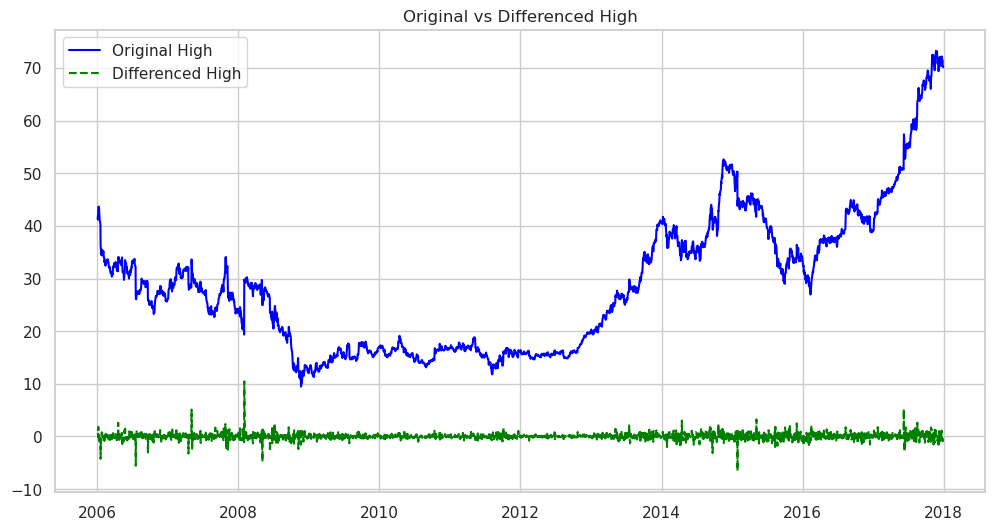

In [46]:
df['high_diff'] = df['High'].diff()
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df['High'], label = 'Original High', color= 'blue')
plt.plot(df['high_diff'], label= 'Differenced High', linestyle ='--', color = 'green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

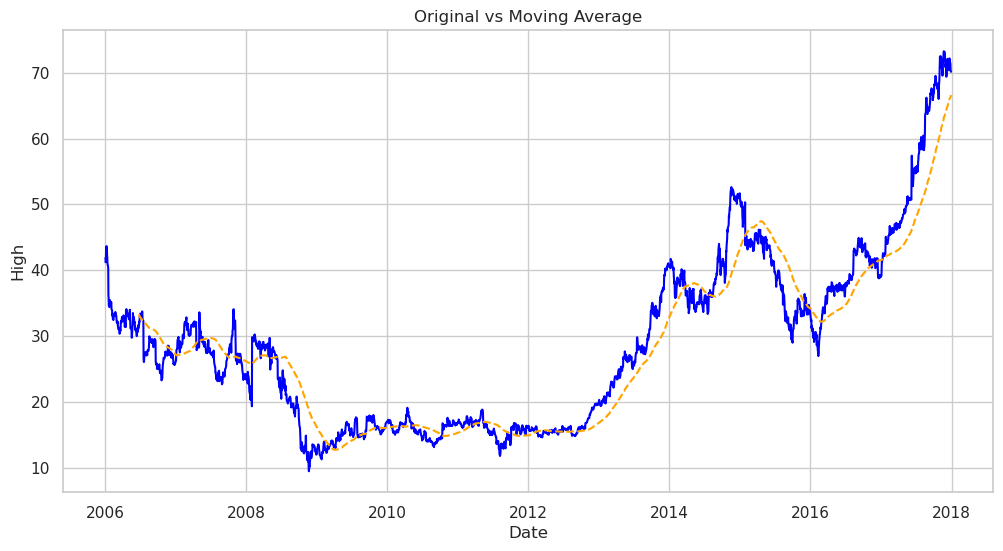

In [54]:
# moving average 

# This sets the size of the moving average window to 120 days
#It means that the moving average will be calculated using the past 120 days of data at each point.

# .mean(): Calculates the average of the values within each rolling window.

window_size = 120

df['high_smoothed'] = df['High'].rolling(window=window_size).mean()
plt.figure(figsize=(12,6))
plt.plot(df['High'], label='Original High', color = 'blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.show()